In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [90]:
df_power = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [91]:
pd.set_option('display.max_columns',100)

In [92]:
df_power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [93]:
df_power.shape

(908, 25)

DataSet Contains 908 columns and 25 rows.

In [94]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [95]:
df_power.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [96]:
df_power.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [97]:
df_power.isnull().sum()/df_power.shape[0]*100 # checking the percentage og null values

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

### Backup Data:

In [98]:
Power_project = df_power.copy()

### Observations:

* As per the dataset problem statement need to predict fule type and capacity_mw (electrical generating capacity) its seems
  one is classification and second one is regression.
* There are many missing values in the dataset and 3 columns has 100% missing values.
* Huge variations among the columns.
* Thre are many columns like 'capacity_mw' where standard deviation is higher then mean.

### NaN Treatment :

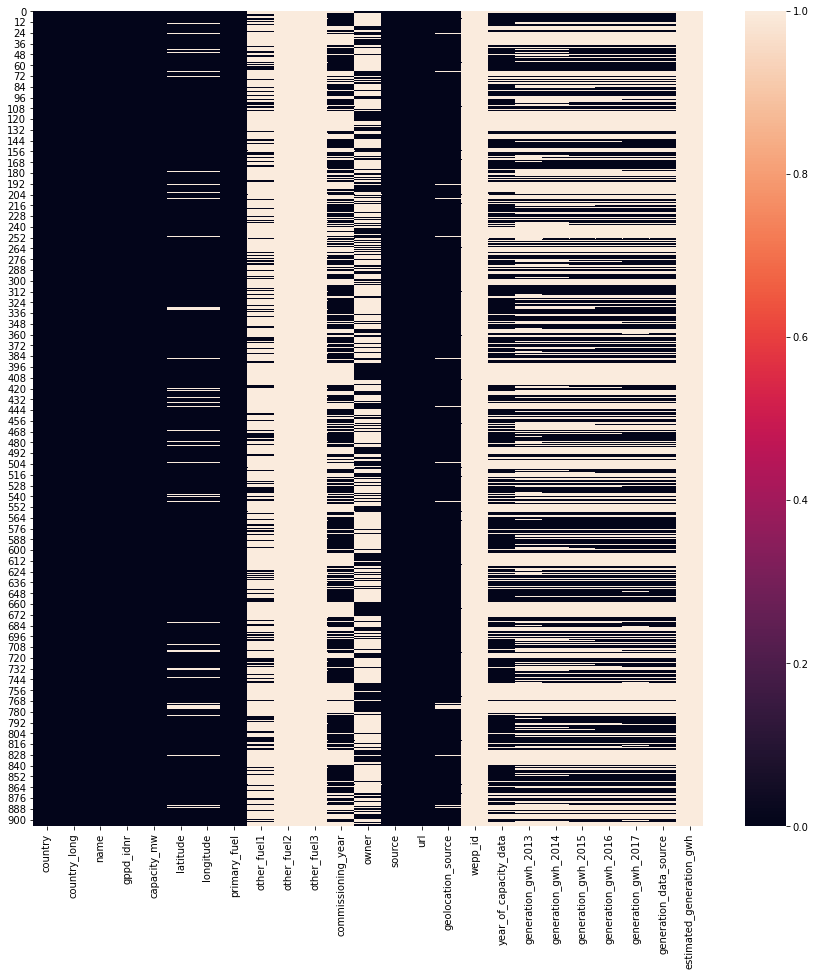

In [99]:
plt.figure(figsize=(15,15)) # visualizing the null values by heatmap
sns.heatmap(df_power.isnull())

In [100]:
#Importing the simple imputer 
from sklearn.impute import SimpleImputer

In [101]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [102]:
df_power[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=imputer.fit_transform(df_power[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [103]:
imputer_by_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [104]:
df_power[['commissioning_year','geolocation_source','year_of_capacity_data']]=imputer_by_mode.fit_transform(df_power[['commissioning_year','geolocation_source','year_of_capacity_data']])

We have filled null values of those columns which have less then 60% null value.

In [105]:
df_power = df_power.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_data_source','estimated_generation_gwh','url'],axis=1)

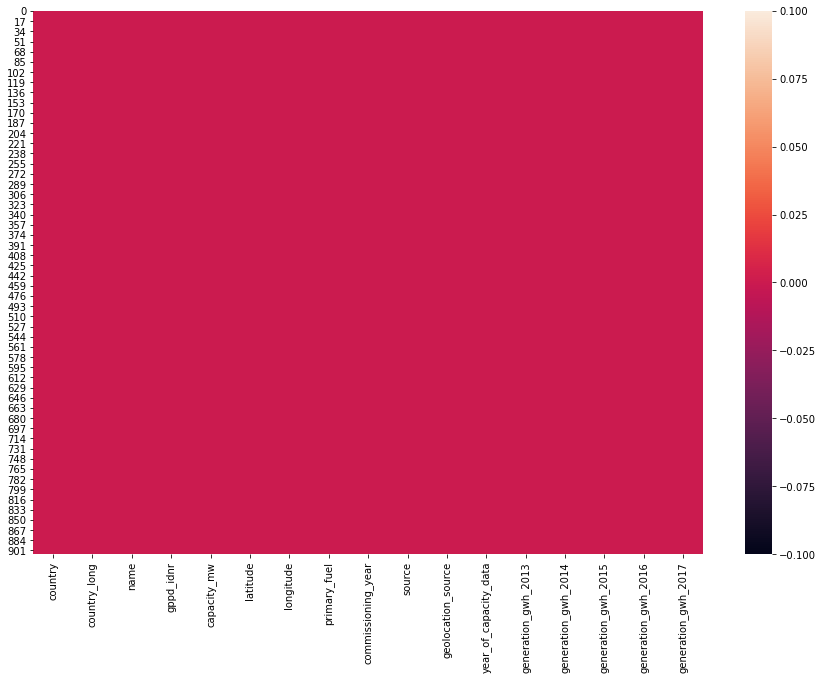

In [106]:
plt.figure(figsize=(15,10)) # visualizing the null values by heatmap
sns.heatmap(df_power.isnull())

In [111]:
df_power_for_regression = df_power.copy() # creating copy of dataframe for our regressionmodel

In [112]:
df_power_for_regression.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

### Exploratry Data Analysis(EDA)

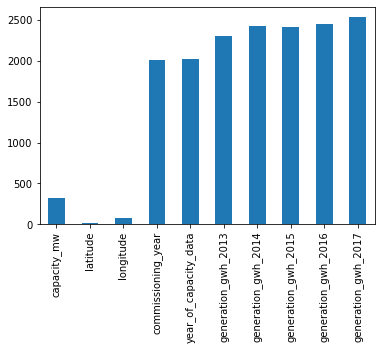

In [19]:
df_mean=df_power.describe()
df_mean.loc['mean'].plot(kind='bar') # checking the variations among the columns

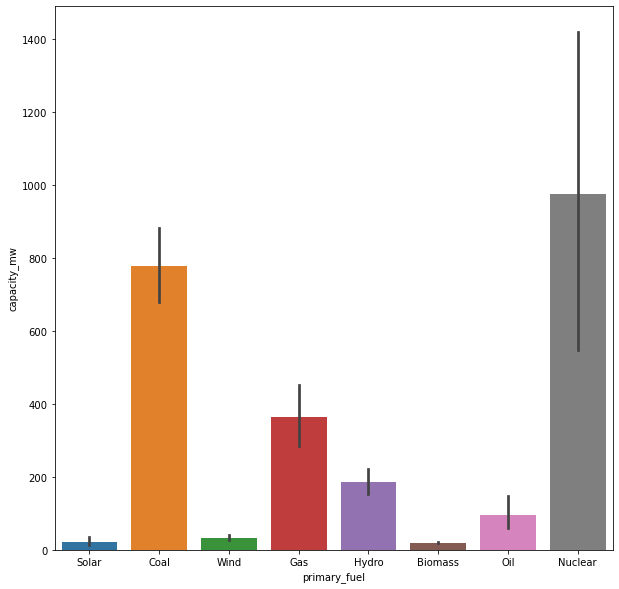

In [20]:
#Checking the relation with primary_fuel and capacity_mw
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df_power)

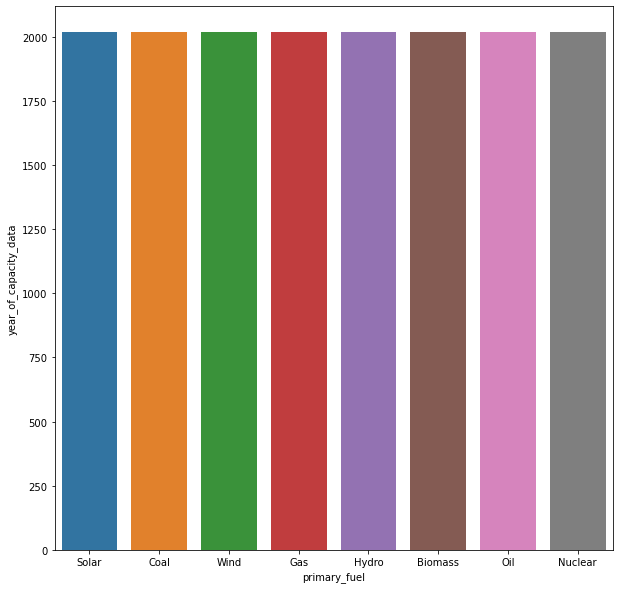

In [21]:
#Checking the relation with primary_fuel and year_of_capacity_data
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='year_of_capacity_data',data=df_power)

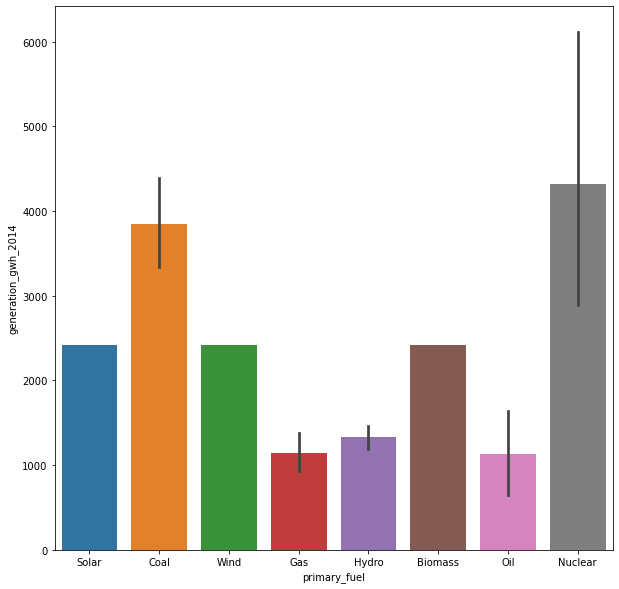

In [22]:
#Checking the relation with primary_fuel and year_of_capacity_data
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df_power)

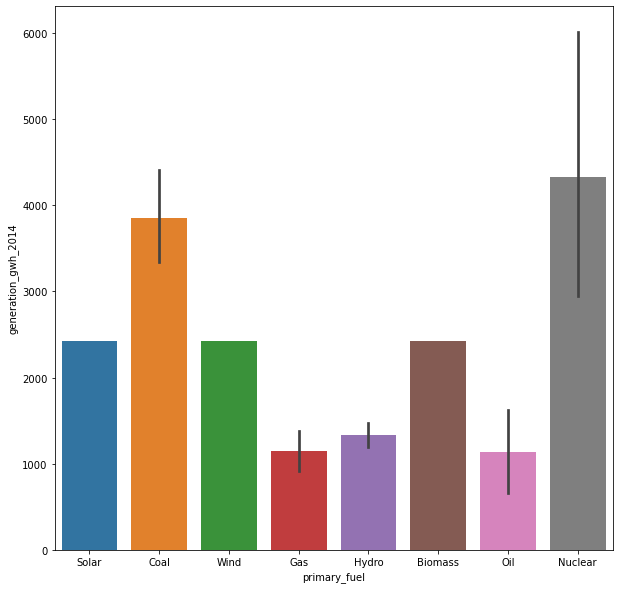

In [23]:
#Checking the relation with primary_fuel and generation_gwh_2014
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df_power)

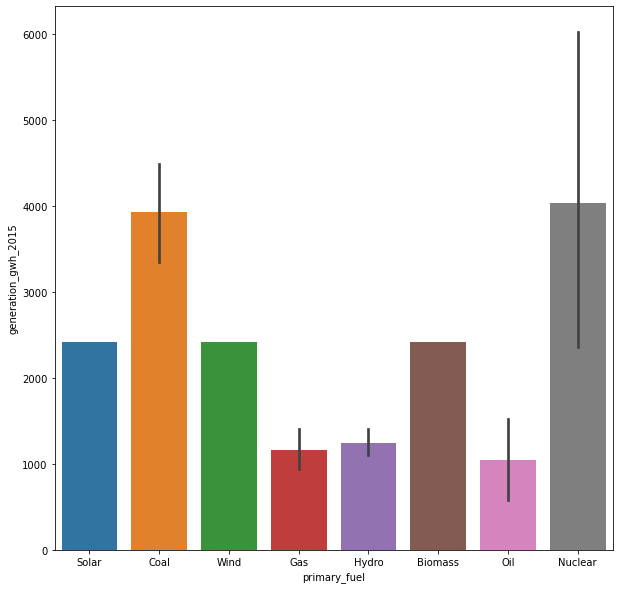

In [24]:
#Checking the relation with primary_fuel and generation_gwh_2015
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df_power)

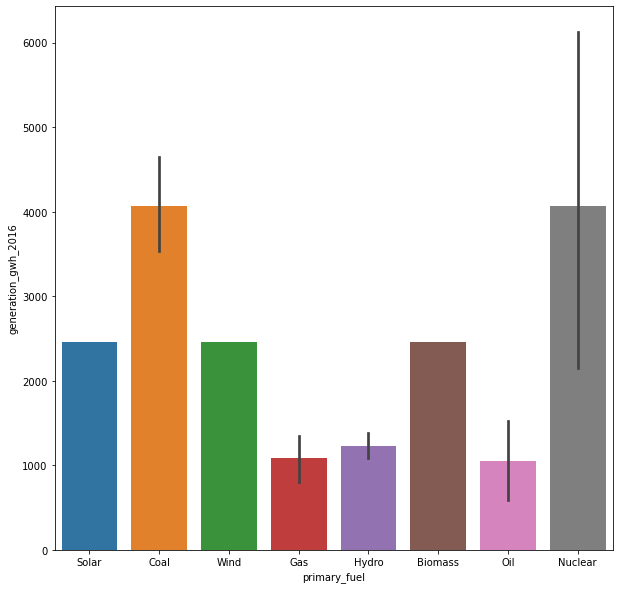

In [25]:
#Checking the relation with primary_fuel and generation_gwh_2016
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df_power)

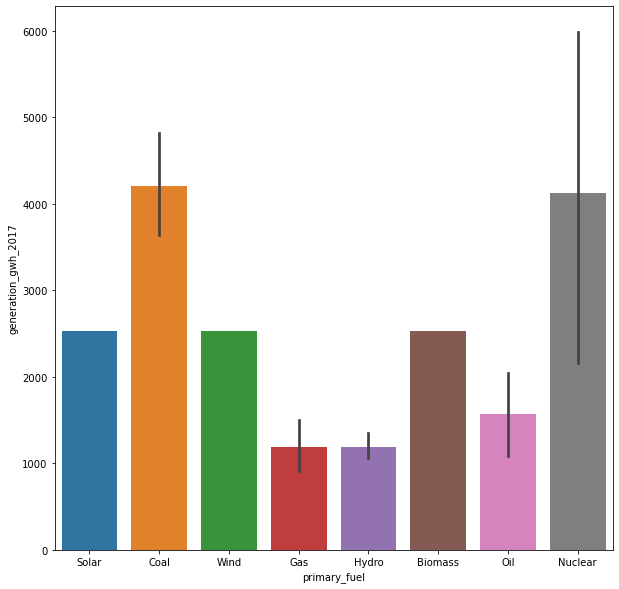

In [26]:
#Checking the relation with primary_fuel and generation_gwh_2017
plt.figure(figsize=(10,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df_power)

In [27]:
#Checking correlation using heatmap
corr = df_power.corr()

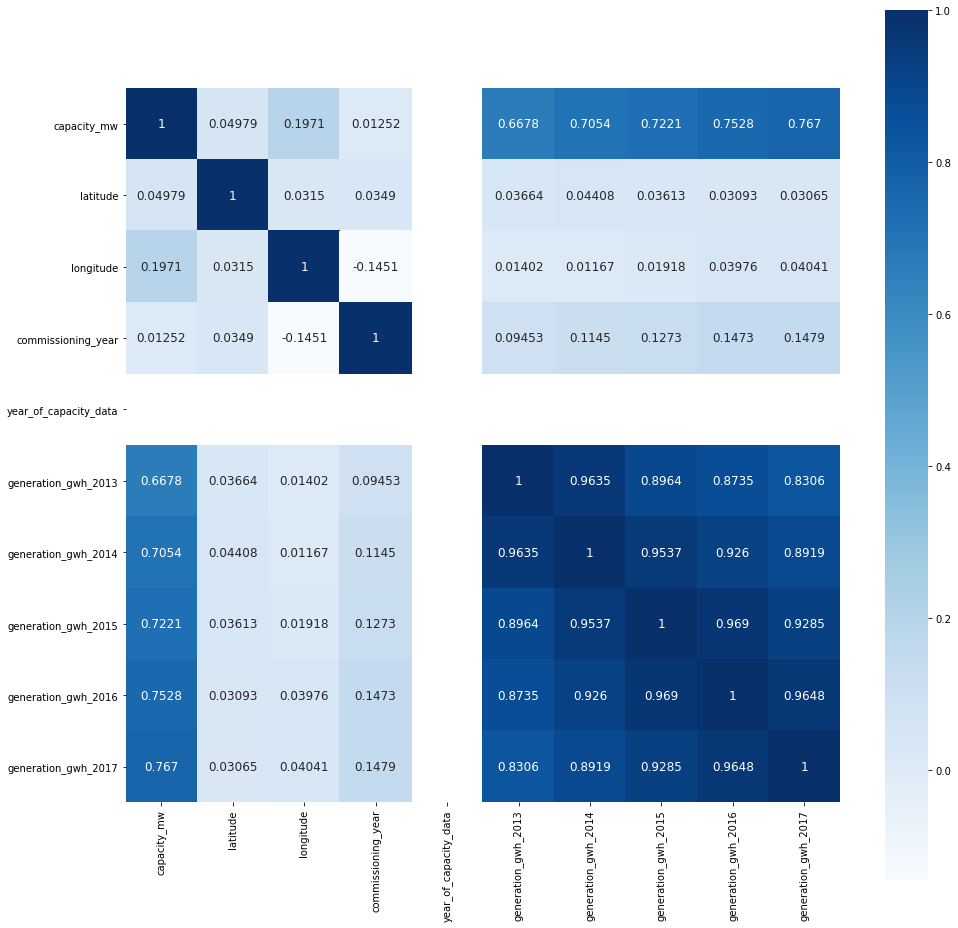

In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

As per above 'year_of_capacity_data' shows no relation with features we can drop it and 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017 ' shows highly correlated.

#### Outliar Detections & Removel

In [29]:
# Filltering the numeric columns
numeric_data = df_power.select_dtypes(include=['int64','float64'])
numeric_data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

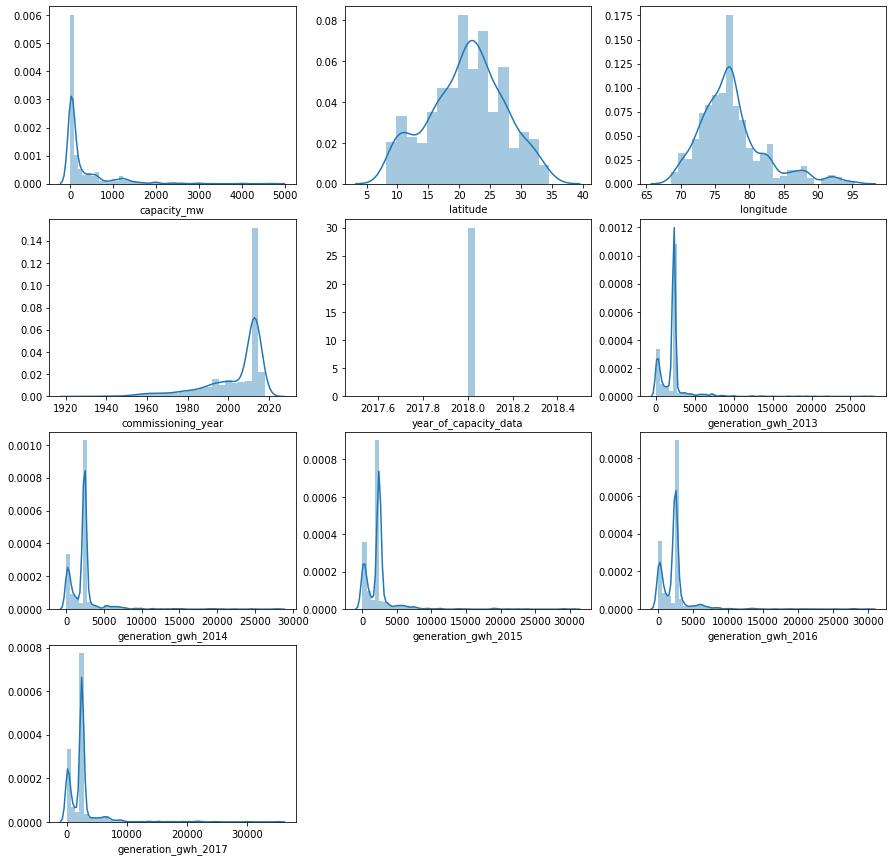

In [30]:
# Checking the distribution of data
plt.figure(figsize=(15,15))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [31]:
from sklearn.preprocessing import PowerTransformer # using pwer transformation for outlair removel

In [32]:
power = PowerTransformer(method='yeo-johnson')

In [33]:
df_power['capacity_mw '] = power.fit_transform(df_power['capacity_mw'].values.reshape(-1,1))
df_power['longitude'] = power.fit_transform(df_power['longitude'].values.reshape(-1,1))
df_power['generation_gwh_2013'] = power.fit_transform(df_power['generation_gwh_2013'].values.reshape(-1,1))
df_power['generation_gwh_2014'] = power.fit_transform(df_power['generation_gwh_2014'].values.reshape(-1,1))
df_power['generation_gwh_2015'] = power.fit_transform(df_power['generation_gwh_2015'].values.reshape(-1,1))
df_power['generation_gwh_2016'] = power.fit_transform(df_power['generation_gwh_2016'].values.reshape(-1,1))
df_power['generation_gwh_2017'] = power.fit_transform(df_power['generation_gwh_2017'].values.reshape(-1,1))

In [34]:
# Filltering the numeric columns
numeric_data1 = df_power.select_dtypes(include=['int64','float64'])

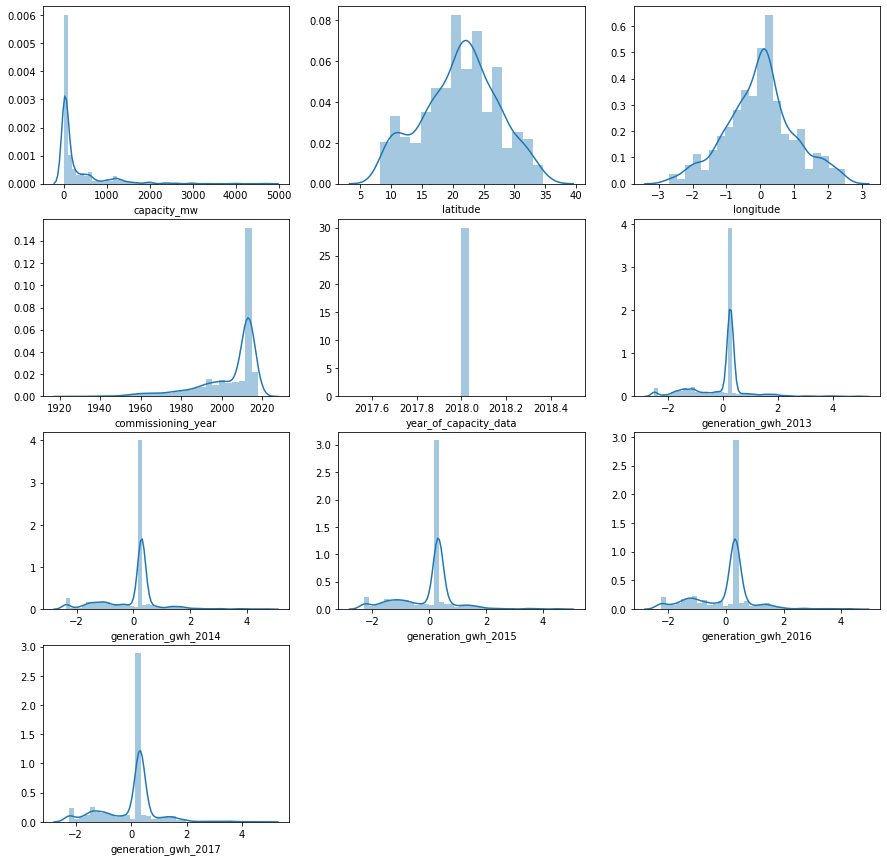

In [35]:
# Checking the distribution of data
plt.figure(figsize=(15,15))
plotnumber=1
for column in numeric_data1:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data1[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

### Feature Engineering :

Endoding Categorical Variables :

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
df_power.country = le.fit_transform(df_power.country)
df_power.country_long = le.fit_transform(df_power.country_long)
df_power.name = le.fit_transform(df_power.name)
df_power.primary_fuel = le.fit_transform(df_power.primary_fuel)
df_power.source = le.fit_transform(df_power.source)
df_power.geolocation_source = le.fit_transform(df_power.geolocation_source)

In [39]:
df_power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,0,0,0,WRI1020239,2.5,28.1839,-0.953208,6,2011.0,109,1,2018.0,0.275916,0.288574,0.314141,0.318130,0.315890,-1.695723
1,0,0,1,WRI1019881,98.0,24.7663,-0.545103,1,2013.0,174,2,2018.0,0.275916,0.288574,0.314141,0.318130,0.315890,0.192511
2,0,0,2,WRI1026669,39.2,21.9038,-2.380298,7,2013.0,21,2,2018.0,0.275916,0.288574,0.314141,0.318130,0.315890,-0.294920
3,0,0,3,IND0000001,135.0,23.8712,2.188101,2,2004.0,22,2,2018.0,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449,0.360587
4,0,0,4,IND0000002,1800.0,21.9603,1.122921,1,2015.0,22,2,2018.0,-0.066258,0.544049,1.389487,1.431262,1.185388,1.660257


Feature Selection :

In [40]:
from sklearn.ensemble import ExtraTreesClassifier #using 'ExtraTreesClassifier' for feature selection

In [41]:
X_feature = df_power.drop(['primary_fuel','gppd_idnr'],axis=1)
y_feature = df_power['primary_fuel']

In [42]:
model = ExtraTreesClassifier()

In [43]:
model.fit(X_feature,y_feature)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_)

[0.         0.         0.03794026 0.0796347  0.08531648 0.08664694
 0.11935238 0.11844135 0.14748099 0.         0.03613363 0.04129232
 0.04591484 0.0487366  0.05545242 0.0976571 ]


In [45]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

country                  0.000000
country_long             0.000000
name                     0.037940
capacity_mw              0.079635
latitude                 0.085316
longitude                0.086647
commissioning_year       0.119352
source                   0.118441
geolocation_source       0.147481
year_of_capacity_data    0.000000
generation_gwh_2013      0.036134
generation_gwh_2014      0.041292
generation_gwh_2015      0.045915
generation_gwh_2016      0.048737
generation_gwh_2017      0.055452
capacity_mw              0.097657
dtype: float64

As per above feature selection technique there are columns like 'country','country_long','year_of_capacity_data'less important.

#### Spliting the data into dependent and independent variables.

In [46]:
X = df_power.drop(['primary_fuel','gppd_idnr'],axis=1)
y = df_power['primary_fuel']

In [47]:
print("The Shape Of X",X.shape)
print("The Shape Of Y",y.shape)

The Shape Of X (908, 16)
The Shape Of Y (908,)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
x_scaler = scaler.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

## Model Building :

Importing libraries for model building......!

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
gdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [54]:
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[16:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [55]:
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

knn classification score 0.8296622613803231
dt classification score 1.0
rf classification score 1.0
adb classification score 0.4845814977973568
gdboost classification score 1.0
xgboost classification score 1.0


### Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [57]:
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [58]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[ 7  0  0  0  0  0  0  3]
 [ 7 54  0  8  0  0  0  4]
 [ 0  8  2  7  0  0  0  1]
 [ 0 11  3 47  0  0  0  1]
 [ 0  2  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 1  1  0  0  0  0  0 27]]


In [59]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[10  0  0  0  0  0  0  0]
 [ 6 51  3  6  1  4  2  0]
 [ 0  2  8  7  0  1  0  0]
 [ 0  7  4 51  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 29]]


In [60]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[10  0  0  0  0  0  0  0]
 [ 4 63  1  3  0  1  0  1]
 [ 0  2  6  9  0  1  0  0]
 [ 0  7  2 53  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 29]]


In [61]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[ 0 10  0  0  0  0  0  0]
 [ 0 19  0 54  0  0  0  0]
 [ 0  2  0 16  0  0  0  0]
 [ 0  0  0 62  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0 29  0  0  0  0  0  0]]


In [62]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[10  0  0  0  0  0  0  0]
 [ 5 61  2  5  0  0  0  0]
 [ 0  2  6  8  0  2  0  0]
 [ 0  6  2 54  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 29]]


In [63]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[ 9  1  0  0  0  0  0  0]
 [ 3 63  3  2  0  1  0  1]
 [ 0  1 10  6  0  1  0  0]
 [ 0  5  3 54  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 29]]


In [64]:
knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)



gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 knn classification_report 
               precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.70      0.74      0.72        73
           2       0.33      0.11      0.17        18
           3       0.76      0.76      0.76        62
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        30
           7       0.75      0.93      0.83        29

    accuracy                           0.74       227
   macro avg       0.50      0.53      0.50       227
weighted avg       0.71      0.74      0.71       227

 dt classification_report 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.84      0.70      0.76        73
           2       0.44      0.44      0.44        18
           3       0.78      0.82      0.80        62
           4       0.

I checked 'accuracy' scores with and without features as per above feature selection technique gave us less score however i am getting scores good without removing the features hence i am keeping it as it is.

## ROC AND AUC :

for performance measurement..........!

In [65]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [66]:
print(roc_auc_score(y_test,knn.predict_proba(X_test),multi_class='ovr'))
print(roc_auc_score(y_test,dt.predict_proba(X_test),multi_class='ovr'))
print(roc_auc_score(y_test,rf.predict_proba(X_test),multi_class='ovr'))
print(roc_auc_score(y_test,adb.predict_proba(X_test),multi_class='ovr'))
print(roc_auc_score(y_test,gdboost.predict_proba(X_test),multi_class='ovr'))
print(roc_auc_score(y_test,xgboost.predict_proba(X_test),multi_class='ovr'))

0.9054374943755037
0.793966053749453
0.97487551190954
0.7320320582446882
0.954111427874125
0.9656151592454327


In [67]:
# #lets find roc curve to check best fittted model
# disp = plot_roc_curve(dt,X_test,y_test)
# plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
# plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
# plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
# plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
# plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
# plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
# plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
# plt.legend(prop = {'size':11}, loc ='lower right')

### CrossValidation :

In [68]:
from sklearn.model_selection import KFold,cross_val_score

In [69]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [70]:
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=5))
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5))

Cross validation score for knn model => [0.31868132 0.33516484 0.37362637 0.38674033 0.39779006]
Cross validation score for dt model => [0.77472527 0.75824176 0.83516484 0.8121547  0.77900552]
Cross validation score for rf model => [0.82967033 0.83516484 0.86263736 0.83425414 0.87292818]
Cross validation score for adb model => [0.61538462 0.62637363 0.6043956  0.45856354 0.4640884 ]
Cross validation score for gdboost model => [0.83516484 0.85714286 0.88461538 0.82872928 0.83977901]
[16:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' wa

In [71]:
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Mean of Cross validation score for knn model => 0.36240058284257176
Mean of Cross validation score for dt model => 0.7929816040313279
Mean of Cross validation score for rf model => 0.8502155303260276
Mean of Cross validation score for adb model => 0.5537611559711008
Mean of Cross validation score for gdboost  model => 0.850209459049238
[16:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:59] WARNING: C:/Users/Administrat

as per the above cross validation and achieved score i have compared the best model and found our xgboost model giving the best score hence i will check the hyperparameter tuning for it to check the chances the increase the accuracy.

### HyperParameter Tuning !

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
xgboost.get_params().keys()  # to check the parameters

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [74]:
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}
parm_grid

{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

In [75]:
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)

In [76]:
gridsearch.fit(X_train,y_train)

[16:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=2,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                      

In [77]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'random_state': 5,
 'subsample': 0.8}

In [78]:
xgboost_tuning=XGBClassifier(learning_rate=1,max_depth=4,min_child_weight=1,random_state=6,subsample=0.5)

In [79]:
xgboost_tuning.fit(X_train,y_train)

[16:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=6, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgboost_tuning.score(X_train,y_train)

1.0

In [81]:
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

In [82]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_tuning_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[10  0  0  0  0  0  0  0]
 [ 3 61  3  4  1  0  0  1]
 [ 0  3  8  5  0  2  0  0]
 [ 0 10  2 49  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 29]]


In [84]:
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.80      0.84      0.82        73
           2       0.50      0.44      0.47        18
           3       0.84      0.79      0.82        62
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.98        29

    accuracy                           0.82       227
   macro avg       0.61      0.63      0.62       227
weighted avg       0.82      0.82      0.82       227



We can see without hyperparameter tuning we are getting 0.86% and with tuning 0.87 so we are saving our model with the tuning.

### Saving Model For Classification: 

In [85]:
import pickle 

In [86]:
power_plant_classification = 'power_plant_model.pickle'

In [87]:
pickle.dump(xgboost_tuning,open(power_plant_classification,'wb'))

###  ModelBuilding For Regression:

In [658]:
df_power_for_regression.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [659]:
df_reg = df_power_for_regression.drop(columns=['name','gppd_idnr','source','year_of_capacity_data'],axis=1)
# droping the wnwanted columns

In [660]:
df_reg.shape

(908, 13)

In [661]:
numeric_data = df_reg.select_dtypes(include=['int64','float64'])
numeric_data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

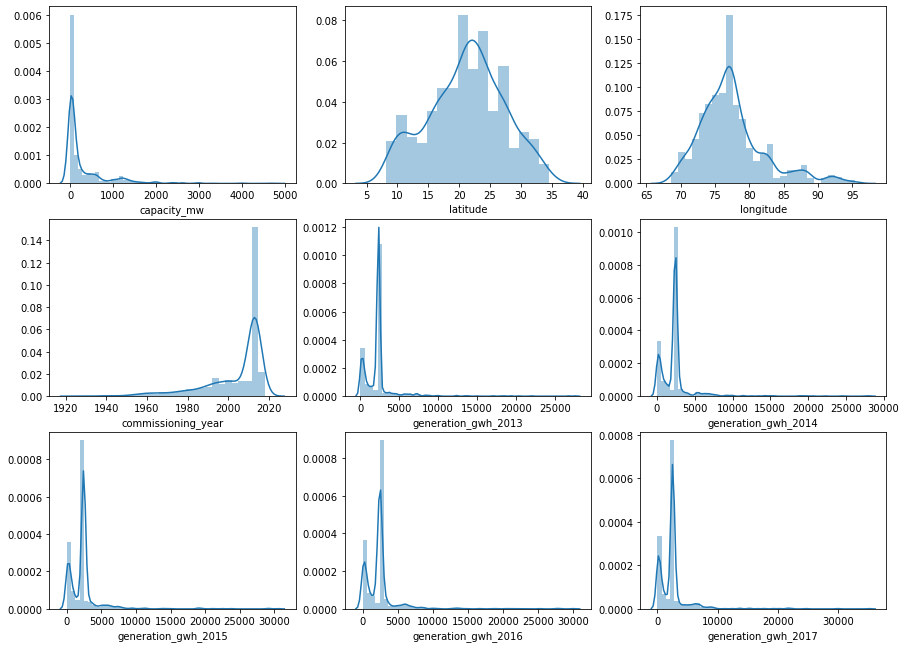

In [662]:
# Checking the distribution of data
plt.figure(figsize=(15,15))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [663]:
# from sklearn.preprocessing import PowerTransformer # using pwer transformation for outlair removel

In [664]:
# power = PowerTransformer(method='yeo-johnson')

In [665]:
# df_reg['longitude'] = power.fit_transform(df_power['longitude'].values.reshape(-1,1))
# df_reg['generation_gwh_2013'] = power.fit_transform(df_reg['generation_gwh_2013'].values.reshape(-1,1))
# df_reg['generation_gwh_2014'] = power.fit_transform(df_reg['generation_gwh_2014'].values.reshape(-1,1))
# df_reg['generation_gwh_2015'] = power.fit_transform(df_reg['generation_gwh_2015'].values.reshape(-1,1))
# df_reg['generation_gwh_2016'] = power.fit_transform(df_reg['generation_gwh_2016'].values.reshape(-1,1))
# df_reg['generation_gwh_2017'] = power.fit_transform(df_reg['generation_gwh_2017'].values.reshape(-1,1))

In [666]:
from scipy.stats import zscore

In [667]:
z_score = zscore(df_reg[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score <2).all(axis=1)
df_reg = df_reg[filtering_entry]
df_reg.describe()
df_reg.head()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,IND,India,98.0,24.7663,74.6090,Coal,2013.0,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,IND,India,39.2,21.9038,69.3732,Wind,2013.0,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,IND,India,135.0,23.8712,91.3602,Gas,2004.0,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,1800.0,21.9603,82.4091,Coal,2015.0,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [668]:
df_reg.shape

(869, 13)

In [669]:
numeric_data3 = df_reg.select_dtypes(include=['int64','float64'])
numeric_data3.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

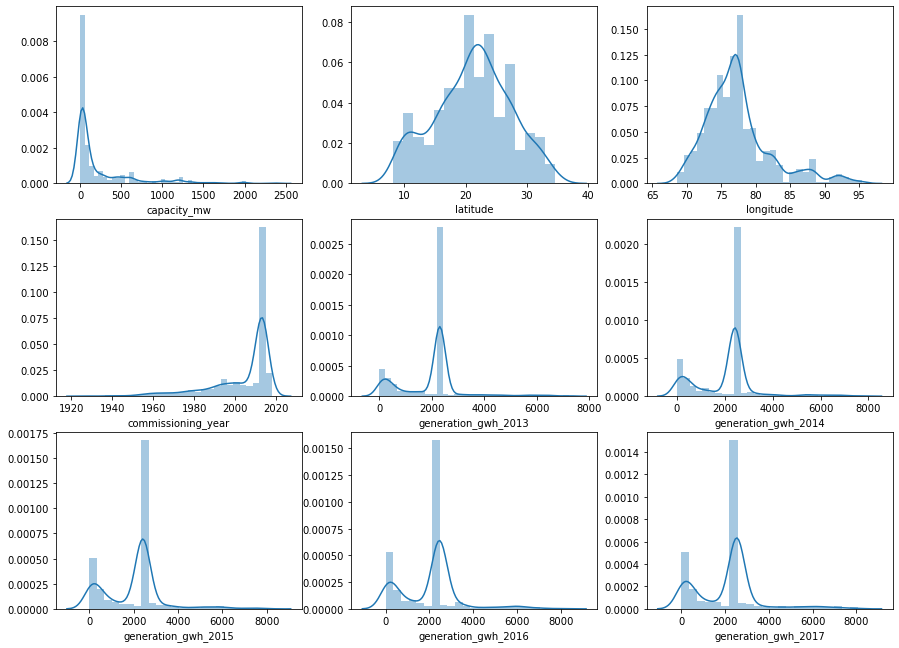

In [670]:
# Checking the distribution of data
plt.figure(figsize=(15,15))
plotnumber=1
for column in numeric_data3:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data3[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [671]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder for endoding categorical data

In [672]:
le = LabelEncoder()

In [673]:
df_reg.country_long = le.fit_transform(df_reg.country_long)
df_reg.primary_fuel = le.fit_transform(df_reg.primary_fuel)
df_reg.geolocation_source = le.fit_transform(df_reg.geolocation_source)

In [674]:
X = df_reg.drop(df_reg[['capacity_mw','country','country_long','commissioning_year']],axis=1)
y = df_reg['capacity_mw']
#,'country_long','latitude','longitude','geolocation_source','commissioning_year'

In [675]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [676]:
scaler = StandardScaler()

In [677]:
x_scaler = scaler.fit_transform(X)

In [678]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

In [679]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [680]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
gboost=GradientBoostingRegressor()
xgboost = XGBRegressor()
print("Model is created")

Model is created


In [681]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [682]:
print("lr_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))
print("svm_score",svm.score(X_train,y_train))
print("gboost_score",gboost.score(X_train,y_train))
print("xgboost_score",xgboost.score(X_train,y_train))

lr_score 0.38013583499269477
knn_score 0.7738032318133822
dt_score 0.999853566652977
rf_score 0.958126836540883
adb_score 0.5273144204710638
svm_score -0.16906068839451938
gboost_score 0.950798358563851
xgboost_score 0.9996321929875452


### Model Evaluation

In [683]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [684]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)
gboost_pred_y = gboost.predict(X_test)
xgboost_pred_y = xgboost.predict(X_test)

In [685]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))
print("gboost_score",mean_squared_error(y_test,gboost_pred_y))
print("xgboost_score",mean_squared_error(y_test,xgboost_pred_y))

lr_score 71000.00226627542
knn_score 25975.37833271945
dt_score 65682.46823609677
rf_score 24711.27210556689
adb_score 82659.5530708583
svm_score 139689.8132176991
gboost_score 18883.071967966276
xgboost_score 27558.116596552616


### CrossValidation :

In [686]:
from sklearn.model_selection import KFold,cross_val_score

In [687]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [688]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scaler,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scaler,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scaler,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scaler,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scaler,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scaler,y,cv=5).mean())
print("Cross validation score for gboost model","=>",cross_val_score(gboost,x_scaler,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,x_scaler,y,cv=5).mean())

Cross validation score for lr model => 0.3246124783915596
Cross validation score for knn model => 0.6830951053653923
Cross validation score for dt model => 0.5616848991123436
Cross validation score for rf model => 0.7300963741933956
Cross validation score for adb model => 0.4316074611922495
Cross validation score for svm model => -0.17219191178623827
Cross validation score for gboost model => 0.6882948397022364
Cross validation score for xgboost model => 0.6690180582445955


As per above usage matrics we found our gboost model only came with positive output.and other model not giving the desirable scores.lets see the hyperparameter tuing and check if we could increase our models accuracy.

#### HyperParameter Tuning :

In [696]:
from sklearn.model_selection import GridSearchCV

In [697]:
gboost.get_params().keys()  # to check the parameters

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [698]:
parm_grid  = {'learning_rate' : [0.1,0.2,0.4],
              'n_estimators' : [100,200],
              'subsample' : [0.1,0.2,0.3],
              'min_samples_split' : [2,4,5],
              'min_samples_leaf' : [1,2,3,4],
              'max_depth' :[3,4]}
             
parm_grid

{'learning_rate': [0.1, 0.2, 0.4],
 'n_estimators': [100, 200],
 'subsample': [0.1, 0.2, 0.3],
 'min_samples_split': [2, 4, 5],
 'min_samples_leaf': [1, 2, 3, 4],
 'max_depth': [3, 4]}

In [705]:
gridsearch = GridSearchCV(gboost, param_grid = parm_grid , cv=5)

In [706]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.4], 'max_depth': [3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 200],
                         'subsample': [0.1, 0.2, 0.3]})

In [707]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'subsample': 0.2}

In [723]:
gboost_tuning=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=2,subsample=0.2,min_samples_split=0.4,n_estimators=100)

In [724]:
gboost_tuning.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=0.4,
                          subsample=0.2)

In [725]:
gboost_tuning.score(X_train,y_train)

-8.995280876678002e-05

In [722]:
gboost_tuning_yprad = gboost_tuning.predict(X_test)

In [726]:
print("gboost_score",mean_squared_error(y_test,gboost_tuning_yprad))

gboost_score 116711.56095649723


without hyperparameter tuning I amgetting the better result hence saving model without tuning.

### Saving Model :

In [727]:
import pickle

In [728]:
global_power_regression = 'global_power_regression.pickle'

In [729]:
pickle.dump(gboost,open(global_power_regression,'wb'))

### Thank You !